# Linear Regression with Outliers

In this notebook, we will go over 2 techniques for regression in the presence of outliers

We will use the `linerrud` dataset from `sklearn`.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_linnerud
from sklearn.linear_model import HuberRegressor, TheilSenRegressor, LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
X, y = load_linnerud(return_X_y=True)

In [3]:
X_data = X[:, 1].reshape(-1, 1)
X_data

array([[162.],
       [110.],
       [101.],
       [105.],
       [155.],
       [101.],
       [101.],
       [125.],
       [200.],
       [251.],
       [120.],
       [210.],
       [215.],
       [ 50.],
       [ 70.],
       [210.],
       [ 60.],
       [230.],
       [225.],
       [110.]])

In [4]:
y_data = y[:, 2].reshape(-1, 1)
y_data

array([[50.],
       [52.],
       [58.],
       [62.],
       [46.],
       [56.],
       [56.],
       [60.],
       [74.],
       [56.],
       [50.],
       [52.],
       [64.],
       [50.],
       [46.],
       [62.],
       [54.],
       [52.],
       [54.],
       [68.]])

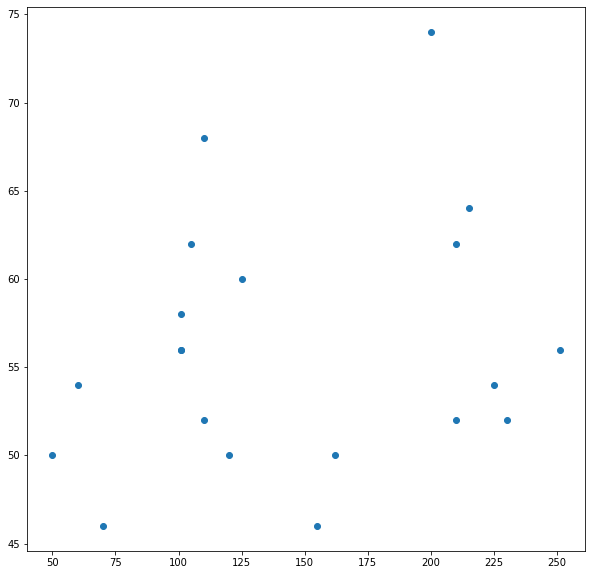

In [5]:
plt.figure(figsize=(10, 10))
plt.scatter(X_data, y_data);

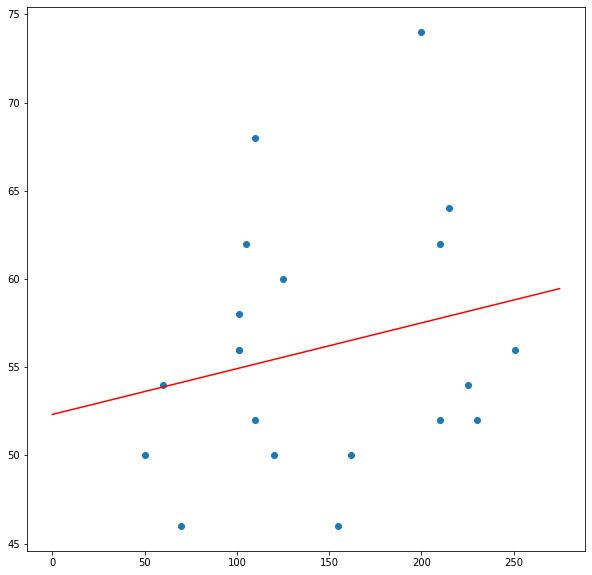

In [6]:
# Linear regression Basic Model
model1 = LinearRegression()
model1.fit(X_data, y_data)

valuesToPredict = np.arange(0, 275, 0.1).reshape(-1, 1)

predictions = model1.predict(valuesToPredict)

plt.figure(figsize=(10, 10))
plt.scatter(X_data, y_data)
plt.plot(valuesToPredict, predictions, c='red');

## Huber Regressor

/home/sandip/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


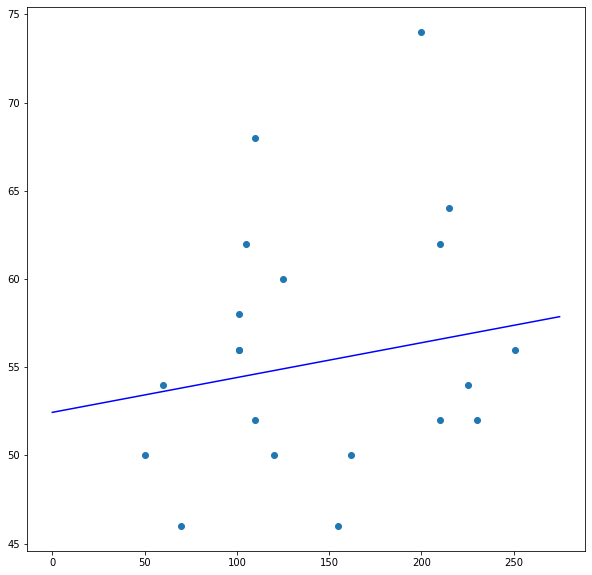

In [7]:
# huber Regression model
model2 = HuberRegressor()

model2.fit(X_data, y_data)

valuesToPredict = np.arange(0, 275, 0.1).reshape(-1, 1)
predictions = model2.predict(valuesToPredict)


plt.figure(figsize=(10, 10))
plt.scatter(X_data, y_data)
plt.plot(valuesToPredict, predictions, c='blue');

/home/sandip/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


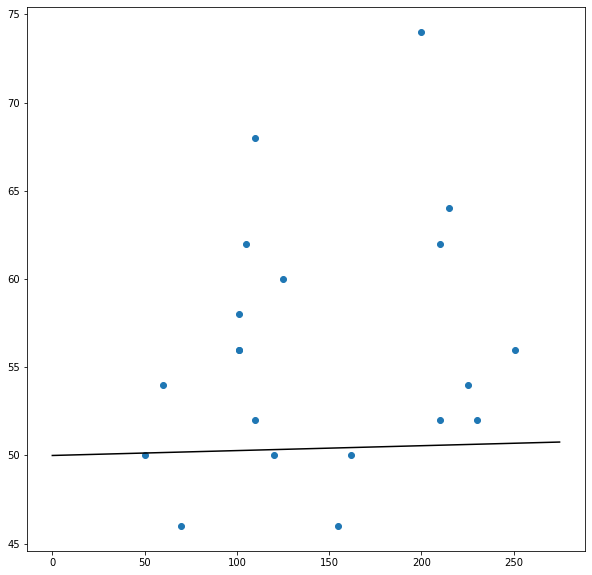

In [8]:
# Theil Sen Basic Model
model3 = TheilSenRegressor()
model3.fit(X_data, y_data)

valuesToPredict = np.arange(0, 275, 0.1).reshape(-1, 1)

predictions = model3.predict(valuesToPredict)


plt.figure(figsize=(10, 10))
plt.scatter(X_data, y_data)
plt.plot(valuesToPredict, predictions, c='black');

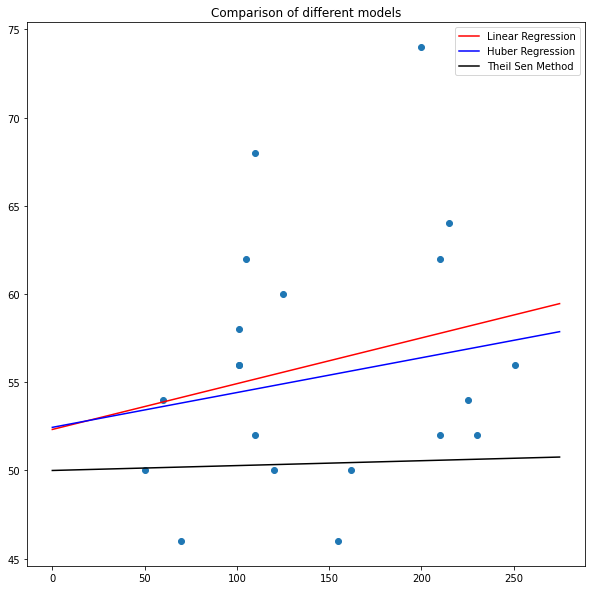

In [9]:
# All together
preds_1 = model1.predict(valuesToPredict) # Linear Regression
preds_2 = model2.predict(valuesToPredict) # Huber
preds_3 = model3.predict(valuesToPredict) # Theil Sen

plt.figure(figsize=(10, 10))

plt.scatter(X_data, y_data)

plt.plot(valuesToPredict, preds_1, c = 'red') # Linear
plt.plot(valuesToPredict, preds_2, c = 'blue') # Huber
plt.plot(valuesToPredict, preds_3, c = 'black') # Theil Sen

plt.legend(['Linear Regression', 'Huber Regression', 'Theil Sen Method'])
plt.title('Comparison of different models')

plt.show()